Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

You are charged with exploring what types of films are currently doing the best at the box office. 

You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

Data to be used: 

"bom.movie_gross.csv"
"rt.movie_info.tsv"
"rt.reviews.tsv"
"tmdb.movies.csv"
"tn.movie_budgets.csv"

Loading of Data files 

Using the Relative File Path because the file is in a subfolder (that is, data/) to adjust the path.

sep='\t' tells pandas that the separator is a tab character, which is what makes it a .tsv.

Avoiding getting an error because the .tsv file I am trying to read is not encoded in UTF-8, which is pandas’ default encoding, I will have to use a different encoding such as latin1. 
This encoding is more lenient and often work with files that contain special characters or non-UTF-8 bytes.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This script reads multiple CSV files into pandas DataFrames.

df_bom = pd.read_csv('data/bom.movie_gross.csv')
df_info =pd.read_csv('data/rt.movie_info.tsv', sep='\t')
df_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
df_tmdb = pd.read_csv('data/tmdb.movies.csv')
df_budgets = pd.read_csv('data/tn.movie_budgets.csv')

df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Data Exploration:

Exploring the loaded datasets to understand the files' structure. 


In [40]:
#Exploratory Data Analysis (EDA) on the five dataframes:
# df_bom, df_info, df_reviews, df_tmdb, df_budgets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

#Loaded dataframes
df_bom = pd.read_csv('data/bom.movie_gross.csv')
df_info =pd.read_csv('data/rt.movie_info.tsv', sep='\t')
df_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
df_tmdb = pd.read_csv('data/tmdb.movies.csv')
df_budgets = pd.read_csv('data/tn.movie_budgets.csv')


In [41]:
# Understanding Basic Structure

dfs = {
    "BOM": df_bom,
    "RT Movie Info": df_info,
    "RT Reviews": df_reviews,
    "TMDB": df_tmdb,
    "Budgets": df_budgets
}

for name, df in dfs.items():
    print(f"\n----- {name} -----")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print(df.head(2))
    print(df.info())



----- BOM -----
Shape: (3387, 5)
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
                        title studio  domestic_gross foreign_gross  year
0                 Toy Story 3     BV     415000000.0     652000000  2010
1  Alice in Wonderland (2010)     BV     334200000.0     691300000  2010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

----- RT Movie Info -----
Shape: (1560, 12)
Columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studi

In [42]:
# 2. Identify Key Variables

# Based on file descriptions:
# Profitability: production_budget, domestic_gross, foreign_gross, worldwide_gross
# Reviews: critic/fresh/rotten, rating, vote_average, vote_count
# Metadata: title, genre, director, release_date


# 3. Initial Data Quality Check

for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum().sort_values(ascending=False).head(10))




Missing values in BOM:
foreign_gross     1350
domestic_gross      28
studio               5
title                0
year                 0
dtype: int64

Missing values in RT Movie Info:
currency        1220
box_office      1220
studio          1066
writer           449
theater_date     359
dvd_date         359
director         199
synopsis          62
runtime           30
genre              8
dtype: int64

Missing values in RT Reviews:
rating        13517
review         5563
critic         2722
publisher       309
fresh             0
id                0
top_critic        0
date              0
dtype: int64

Missing values in TMDB:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Missing values in Budgets:
id                   0
release_date         0
movie                0
production_budget    0

In [48]:
# 4. Clean and Convert Variables


# Clean df_budgets
df_budgets['production_budget'] = df_budgets['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# Create a 'profit' column
df_budgets['profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

# Ensure vote_average and vote_count are numeric in TMDB
df_tmdb['vote_average'] = pd.to_numeric(df_tmdb['vote_average'], errors='coerce')
df_tmdb['vote_count'] = pd.to_numeric(df_tmdb['vote_count'], errors='coerce')
df_tmdb['popularity'] = pd.to_numeric(df_tmdb['popularity'], errors='coerce')


In [44]:
# Check for duplicated titles or IDs
for name, df in dfs.items():
    if 'title' in df.columns:
        print(f"\nDuplicates in {name}: {df['title'].duplicated().sum()}")




Duplicates in BOM: 1

Duplicates in TMDB: 1829


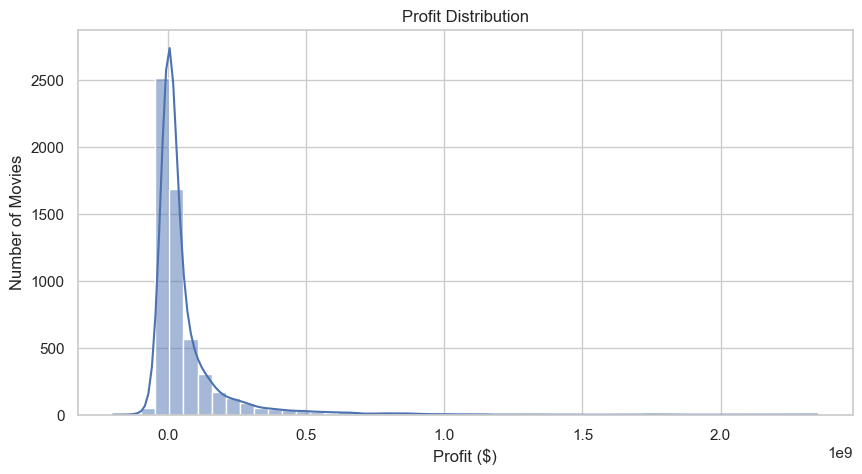

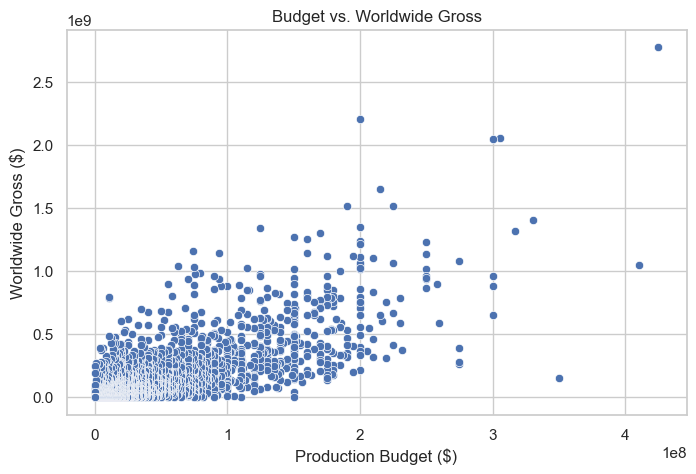

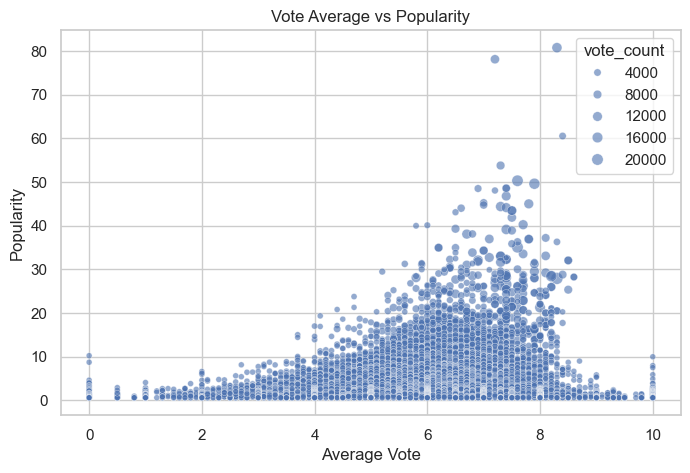

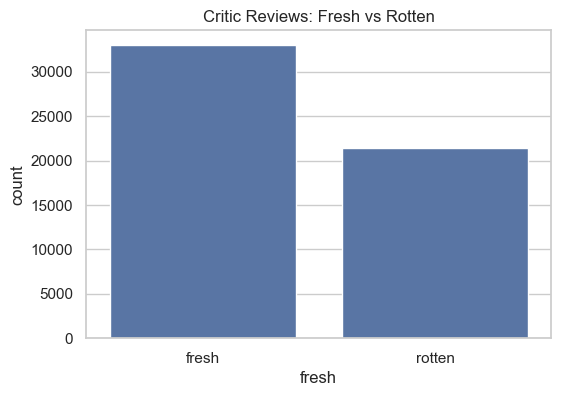

In [46]:
# 5. Visual Explorations


# Profitability Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_budgets['profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit ($)")
plt.ylabel("Number of Movies")
plt.show()

# Budget vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_budgets, x='production_budget', y='worldwide_gross')
plt.title("Budget vs. Worldwide Gross")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.show()

# Vote average vs. popularity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_tmdb, x='vote_average', y='popularity', size='vote_count', alpha=0.6)
plt.title("Vote Average vs Popularity")
plt.xlabel("Average Vote")
plt.ylabel("Popularity")
plt.show()

# Reviews - fresh vs rotten
if 'fresh' in df_reviews.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_reviews, x='fresh')
    plt.title("Critic Reviews: Fresh vs Rotten")
    plt.show()


Summary of insights

In [ ]:
# Summary

print("\n Summary Points:")
print("- BOM & Budgets give revenue and production costs.")
print("- TMDB adds popularity, votes, and audience rating context.")
print("- Reviews (RT) give critic sentiment.")
print("- Cleaned budgets: removed  and commas, computed profit.")
print("- Plotted relationships: profit, budget vs gross, vote impact.")

# Ready for merging & modeling later.